## Cascade R-CNN 

### 배경, Faster RCNN 복습
- 학습해야 할 모델 3가지
    - backbone Conv Network
    - RPN
    - Head Network 


- RPN과 Head를 학습하기 위해 데이터셋을 구성해야 된다.
- 데이터셋을 Positive와 Negative로 구성한다.


- RPN 학습을 위해, 0.7 이상의 IoU를 갖는 anchor box를 Positive로, 0.3 미만의 IoU를 갖는 anchor box를 Negative로 갖는다.
- Head Network는 0.5 이상의 IoU를 갖는 anchor box를 Positive로, 0.5 미만의 IoU를 갖는 anchor box를 Negative로 갖는다.


- Cascade RCNN은 Positive와 Negative sample을 나누는 기준에 특히 집중을 하게 되는데, 결론적으로 기준을 0.5로 잡게 된다.


- 아래 사진은 Positive와 Negative를 나누는 기준을 다르게 설정해서 결과를 시각해 봄.
- 0.5가 기준일 경우, 의미 없는 박스가 훨씬 많아졌다. 
- 즉, False Positive가 상당히 많다는 뜻.

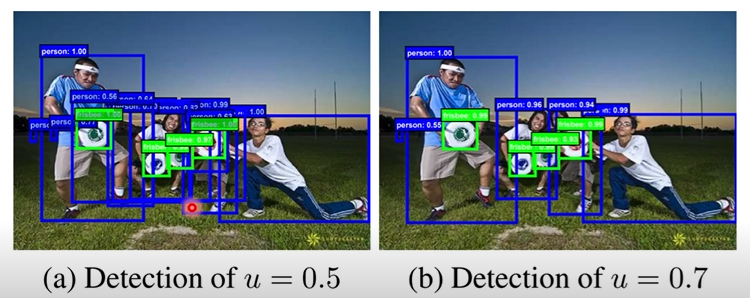

- Input IoU : RPN 결과로 나온 ROI들이(box들이) GT와 어떤 IoU를 갖는가?
- Output IoU : Box head를 통과했을 때, prediction이 GT와 IoU가 어떻게 될까?


- 낮은 IoU input에 대해서는, 낮은 IoU threshold로 학습된 모델이 좋은 Localization performance를 보여준다. (반대도 마찬가지)
- 학습되는 IoU에 따라 대응 가능한 IoU 박스가 다르게 된다.

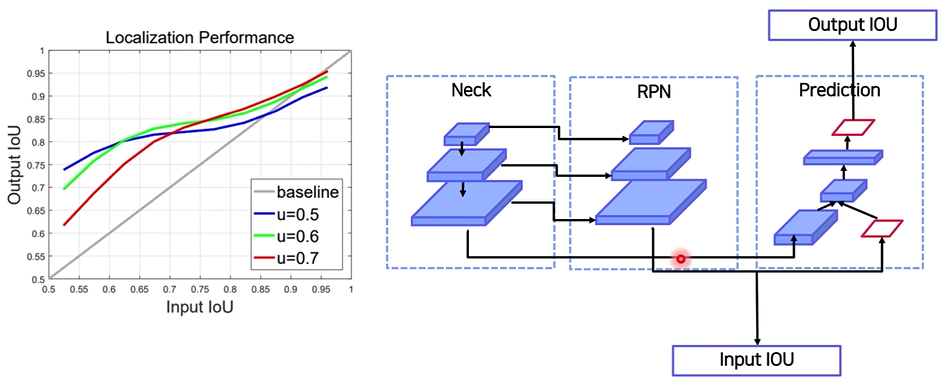

### Cascade R CNN 학습 방법
- Iterative와 Integral 방식을 합침.
    - bbox pooling을 반복하니 성능이 향상이 된다.
    - IoU Threshold가 다른 classifier가 반복되니 성능이 향상이 된다.


- RPN으로부터 얻은 B0을 projection(pool)을 하고 Head1를 통과해서 B1을 얻음
- B1을 projection해서 Head2을 통과해서 B2를 얻음.
- 위의 과정을 통해 최종적으로 C3, B3을 얻음.
- 즉, 여러 개의 RoI Head를 학습하게 되고, Head 별로 IoU threshold(예, u=0.5, 0.6, 0.7)가 다르게 된다.

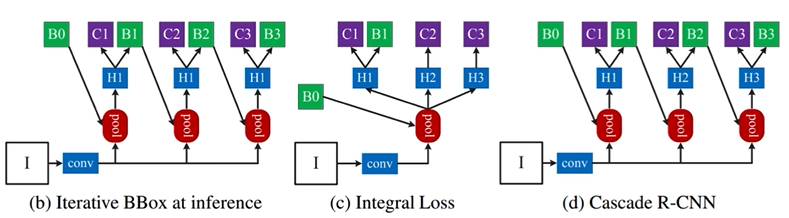